In [38]:
import numpy as np
import pandas as pd
import yfinance as yf
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt

# What are SPDR Sector Funds?


SPDR Sector funds are Exchange-traded funds (ETFs) that divide the stocks that make up the S&P 500 into 11 sectors, e.g. real estate or communications. Instead of having to select and invest in individual companies from each sector to diversify their portfolio, investors can invest in these ETFs.

Naturally, using SPDR Sector Funds is just a rough measure of sector performance since it only contains a subset of stocks that are part of the S&500. A more accurate way would be to measure the returns for all publicly traded stocks belonging to an industry sector.

Here the list of SPDR Sector funds with their corresponding symbol:

- Communication Services (XLC)
- Consumer Discretionary (XLY)
- Consumer Staples (XLP)
- Energy (XLE)
- Financials (XLF)
- Health Care (XLV)
- Industrials (XLI)
- Materials (XLB)
- Real Estate (XLRE)
- Technology (XLK)
- Utilities (XLU).

\begin{align}
sector\_ index_{t} =\sum _{i \in S}\frac{{}^iMC_{t}}{\sum _{j \in S} {}^jMC_{t}} {}^iP_{t}

\end{align}
Where $S$ is the set of all companies in the sector.


In [79]:
Code2Name={
"XLY" : "Consumer Discretionary",
"XLP" : "Consumer Staples",
"XLE" : "Energy",
"XLF" : "Financials",
"XLV" : "Health Care",
"XLI" : "Industrials",
"XLB" : "Materials",
"XLRE" : "Real Estate",
"XLK" : "Technology",
"XLU" : "Utilities"
"XLC" : "Communication Services",
}

SyntaxError: invalid syntax (1517192594.py, line 12)

In [ ]:
SPDR=yf.download(list(Code2Name.keys()))['Adj Close']


[*********************100%***********************]  11 of 11 completed


# Analysis

In [ ]:
def plot(df,start=None):
    if start is None:
        start=df.index.min()
    recessions=DataReader('USREC', 'fred', start=start)['USREC']
    fig, ax = plt.subplots(figsize=(13, 9), dpi=300)
    
    if isinstance(df,pd.DataFrame):
        ylim = (df.min().min(),df.max().max())
    else:
        ylim = (df.min(),df.max())
    df.plot(ax=ax)
    ax.fill_between(recessions.index, ylim[0]-1e-2, ylim[1]+1e-2, recessions,facecolor='k', alpha=0.1)
    fig.legend
    return fig,ax

(<Figure size 3900x2700 with 1 Axes>, <Axes: xlabel='Date'>)

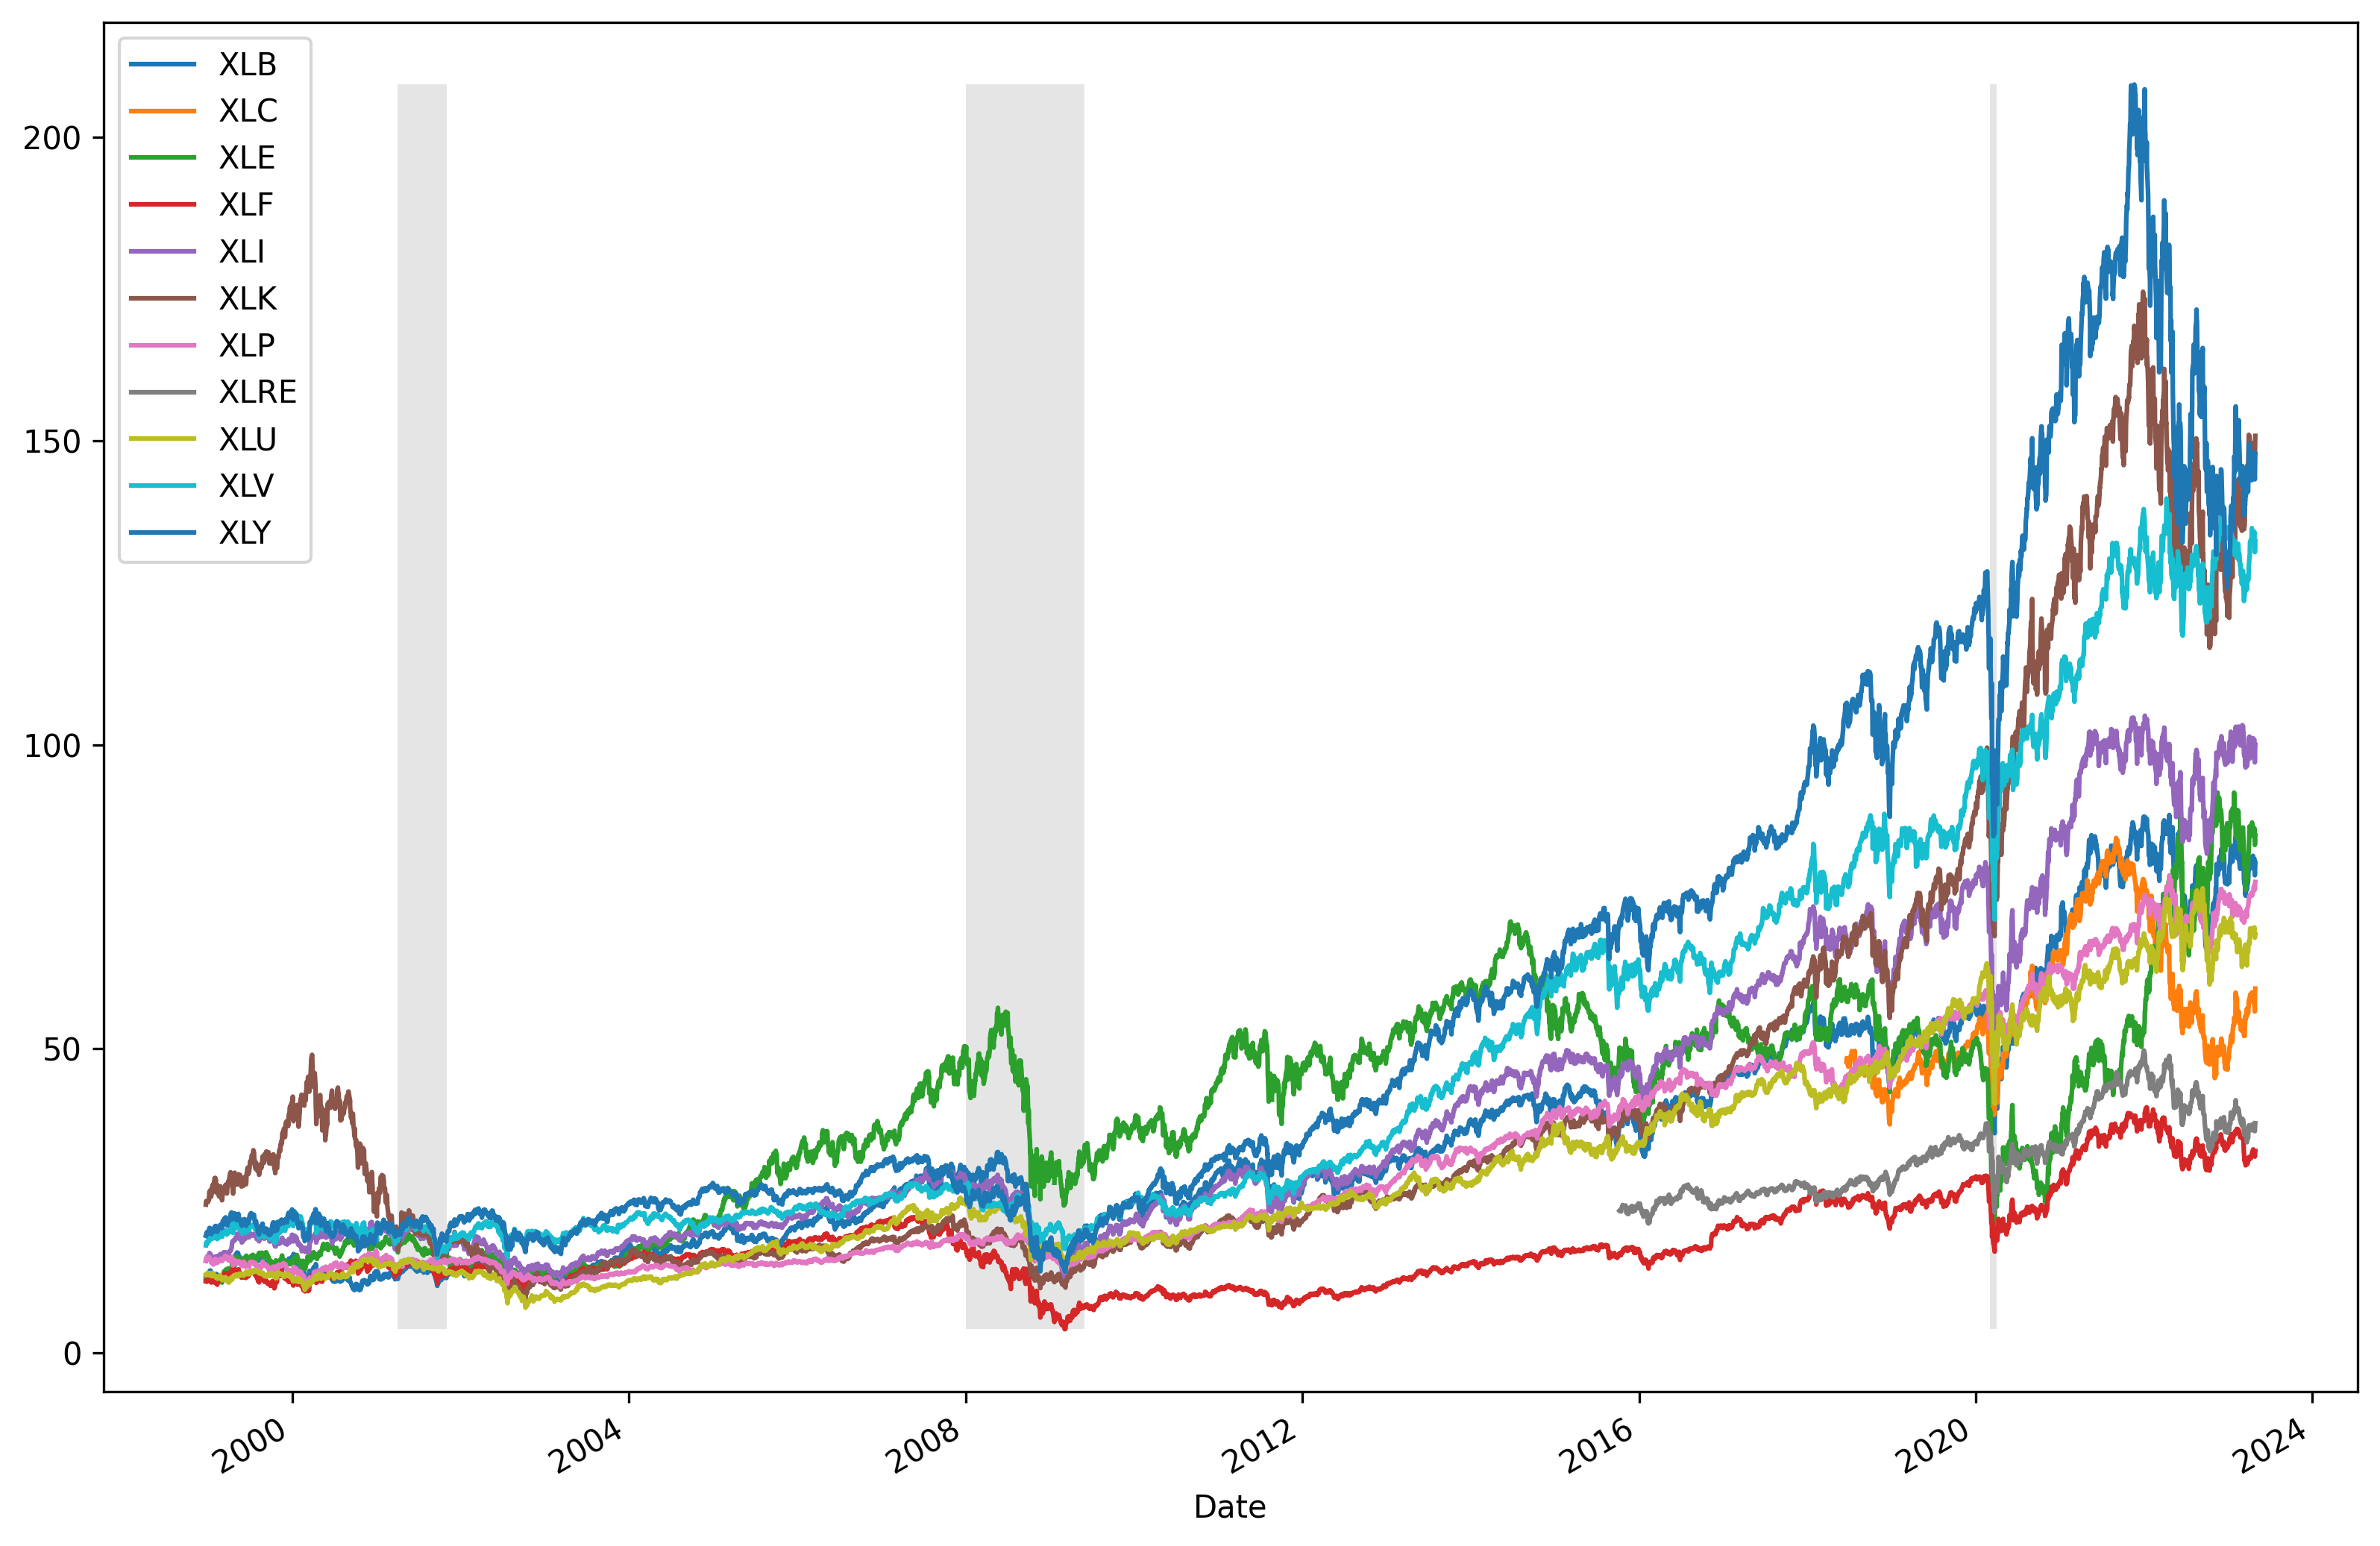

In [ ]:
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
start="1999"
recessions=DataReader('USREC', 'fred', start=start)['USREC']

plot(SPDR)

We can see that XLC and XLRE start form 2018 and 2015 respectively 

In [ ]:
Communication_Services=pd.read_csv(r'Data\Stockanalysis.com\Communication Services\Communication Services.csv',parse_dates=True,index_col=0)
Real_Estate=pd.read_csv(r'Data\Stockanalysis.com\Real Estate\Real Estate.csv',index_col=0,parse_dates=True)

In [ ]:
SPDR['XLC'] = Communication_Services
SPDR['XLRE']= Real_Estate

In [ ]:
recessions = DataReader('USREC', 'fred', start='1999')['USREC']
benchmark=yf.download("^GSPC")['Adj Close'] # SP500
benchmark

[*********************100%***********************]  1 of 1 completed


Date
1927-12-30      17.660000
1928-01-03      17.760000
1928-01-04      17.719999
1928-01-05      17.549999
1928-01-06      17.660000
                 ...     
2023-04-24    4137.040039
2023-04-25    4071.629883
2023-04-26    4055.989990
2023-04-27    4135.350098
2023-04-28    4169.479980
Name: Adj Close, Length: 23946, dtype: float64

In [80]:
# from dateutil.relativedelta import *
    
 

def PeriodPerformance(df):
    return (df.iloc[-1]  / df.iloc[0]) -1

def MonthlyPerforamnce(df):
    return df.pct_change().resample('M').apply(lambda x: (x + 1).prod() - 1).mean()



def Recession_Performance(Sectors, recessions, Column_rename=Code2Name):
    df_perforamce=pd.DataFrame(index=pd.MultiIndex.from_tuples([(None,None)],name=('Year','Metrics')),columns=Sectors.columns).dropna()
    my_list=recessions.rolling(2).mean()
    my_list=my_list[my_list==0.5].dropna()
    recessions_start_end = []
    for i in range(0, len(my_list), 2):
        recessions_start_end.append((my_list.index[i], my_list.index[i+1]))

    for column in Sectors.columns:
        stock_data=Sectors.loc[:,column].copy()
        for start,end in recessions_start_end:
            selected_data = stock_data[((stock_data.index) >= start) & (stock_data.index < end)]
            selected_bench = benchmark[(benchmark.index >= start) & (benchmark.index < end)]
        
        # Calculate the performance of the stock during the selected period
            performance = PeriodPerformance(selected_data)
            bench_performance = PeriodPerformance(selected_bench)
            Monthly_avg_performance = MonthlyPerforamnce(selected_data)
            Monthly_avg_benchmark = MonthlyPerforamnce(selected_bench)
            df_perforamce.loc[(str(start.year),"Average Monthly Return (%)"),column]=Monthly_avg_performance*100
            df_perforamce.loc[(str(start.year),"Monthly Excess Return (%)"),column]=(Monthly_avg_performance-Monthly_avg_benchmark)*100
            df_perforamce.loc[(str(start.year),"Period Return (%)"),column]=performance*100
            df_perforamce.loc[(str(start.year),"Period Excess Return (%)"),column]=(performance-bench_performance)*100
    df_perforamce.rename(columns=Column_rename,inplace=True)
    return df_perforamce


In [83]:
perforamce_NBER=Recession_Performance(SPDR, recessions)
perforamce_NBER

Materials Communication Services     Energy  \
Year Metrics                                                                   
2001 Average Monthly Return (%)   1.664362              -0.543283  -1.776435   
     Monthly Excess Return (%)    1.574853              -0.632792  -1.865945   
     Period Return (%)           11.813616              -5.768736 -14.960422   
     Period Excess Return (%)    12.373893              -5.208459 -14.400145   
2008 Average Monthly Return (%)  -1.931096              -1.891747  -2.164837   
     Monthly Excess Return (%)    0.312051                 0.3514    0.07831   
     Period Return (%)          -35.171981              -32.37253 -38.083583   
     Period Excess Return (%)     1.302218               4.101669  -1.609384   
2020 Average Monthly Return (%)  -1.172719                2.84048  -3.078454   
     Monthly Excess Return (%)    0.666345               4.679545   -1.23939   
     Period Return (%)           -5.007928               4.395076 -17.515226   
     Period Excess Return (%)      0.74569              10.148695 -11.761607   

                                Financials Industrials Technology  \
Year Metrics                                                        
2001 Average Monthly Return (%)  -0.160791     0.46591   0.906875   
     Monthly Excess Return (%)     -0.2503    0.376401   0.817365   
     Period Return (%)           -2.021426     1.01886   1.404979   
     Period Excess Return (%)    -1.461149    1.579137   1.965256   
2008 Average Monthly Return (%)  -3.462312   -2.427141  -1.565935   
     Monthly Excess Return (%)   -1.219165   -0.183994   0.677212   
     Period Return (%)          -55.421096  -40.620045  -28.77356   
     Period Excess Return (%)   -18.946897   -4.145846   7.700639   
2020 Average Monthly Return (%)  -7.708066   -6.289164   0.080506   
     Monthly Excess Return (%)   -5.869002     -4.4501   1.919571   
     Period Return (%)          -17.770122  -14.463266  -1.703775   
     Period Excess Return (%)   -12.016503   -8.709648   4.049844   

                                Consumer Staples Real Estate  Utilities  \
Year Metrics                                                              
2001 Average Monthly Return (%)         0.918212    2.490936  -1.471029   
     Monthly Excess Return (%)          0.828703    2.401426  -1.560538   
     Period Return (%)                  7.280014   21.344039 -11.506572   
     Period Excess Return (%)           7.840291   21.904316 -10.946296   
2008 Average Monthly Return (%)         -0.83491   -1.687833  -1.766409   
     Monthly Excess Return (%)          1.408237    0.555314   0.476738   
     Period Return (%)                -15.843323  -36.365869 -29.761901   
     Period Excess Return (%)          20.630876     0.10833   6.712298   
2020 Average Monthly Return (%)        -1.683931    3.254963  -5.830068   
     Monthly Excess Return (%)          0.155133    5.094028  -3.991004   
     Period Return (%)                 -4.086329    6.529518 -12.160912   
     Period Excess Return (%)           1.667289   12.283137  -6.407294   

                                Health Care Consumer Discretionary  
Year Metrics                                                        
2001 Average Monthly Return (%)    0.246159               0.979383  
     Monthly Excess Return (%)      0.15665               0.889874  
     Period Return (%)            -0.408591               5.524404  
     Period Excess Return (%)      0.151686                6.08468  
2008 Average Monthly Return (%)   -1.228099              -1.298113  
     Monthly Excess Return (%)     1.015048               0.945034  
     Period Return (%)           -22.333936             -26.459826  
     Period Excess Return (%)     14.140262              10.014373  
2020 Average Monthly Return (%)     2.19882               0.571355  
     Monthly Excess Return (%)     4.037884               2.410419  
     Period Return (%)             3.366736               -2.20702

In [ ]:
perforamce_GDP=Recession_Performance(SPDR, DataReader('JHDUSRGDPBR', 'fred', start='1999'))
perforamce_GDP

Materials Communication Services     Energy  \
Year Metrics                                                                   
2001 Period Return (%)            -7.18914             -10.183476  -21.34132   
     Period Excess Return (%)    11.694655               8.700319  -2.457525   
     Average Monthly Return (%)  -0.654676              -0.572288  -2.483657   
     Monthly Excess Return (%)    1.475572                1.55796  -0.353409   
2007 Period Return (%)          -36.996227              -34.24638 -35.150763   
     Period Excess Return (%)     3.579325               6.329172   5.424789   
     Average Monthly Return (%)   -1.78173              -1.727672  -1.616336   
     Monthly Excess Return (%)    0.450076               0.504134    0.61547   
2020 Period Return (%)           -6.032626              17.085352 -35.303409   
     Period Excess Return (%)    -1.196306              21.921672 -30.467089   
     Average Monthly Return (%)  -0.554167               2.896992  -4.962798   
     Monthly Excess Return (%)   -0.076846               3.374313  -4.485477   

                                Financials Industrials Technology  \
Year Metrics                                                        
2001 Period Return (%)          -12.934226  -19.995616  -34.74573   
     Period Excess Return (%)     5.949569   -1.111821 -15.861935   
     Average Monthly Return (%)  -1.441636   -2.151557  -3.489047   
     Monthly Excess Return (%)    0.688612   -0.021309  -1.358799   
2007 Period Return (%)          -63.517989    -44.7809 -31.437542   
     Period Excess Return (%)   -22.942438   -4.205348    9.13801   
     Average Monthly Return (%)   -3.89585   -2.419058  -1.492938   
     Monthly Excess Return (%)   -1.664044   -0.187252   0.738867   
2020 Period Return (%)          -24.436692   -16.22605  12.779858   
     Period Excess Return (%)   -19.600372   -11.38973  17.616179   
     Average Monthly Return (%)  -4.038024   -2.440254   2.343398   
     Monthly Excess Return (%)   -3.560703   -1.962933   2.820719   

                                Consumer Staples Real Estate  Utilities  \
Year Metrics                                                              
2001 Period Return (%)                -10.267278   -3.626298  -8.507297   
     Period Excess Return (%)           8.616517   15.257497  10.376498   
     Average Monthly Return (%)         -1.13354    0.003921  -0.938914   
     Monthly Excess Return (%)          0.996708    2.134169   1.191335   
2007 Period Return (%)                -13.925987  -46.632906 -26.156425   
     Period Excess Return (%)          26.649564   -6.057355  14.419126   
     Average Monthly Return (%)        -0.602322    -2.24424  -1.267369   
     Monthly Excess Return (%)          1.629484   -0.012434   0.964437   
2020 Period Return (%)                 -4.872906   18.597973  -9.934522   
     Period Excess Return (%)          -0.036586   23.434293  -5.098202   
     Average Monthly Return (%)        -0.704675    2.954664  -1.473514   
     Monthly Excess Return (%)         -0.227354    3.431984  -0.996193   

                                Health Care Consumer Discretionary  
Year Metrics                                                        
2001 Period Return (%)           -10.011057              -9.437266  
     Period Excess Return (%)      8.872738               9.446529  
     Average Monthly Return (%)   -0.891002              -0.830481  
     Monthly Excess Return (%)     1.239247               1.299767  
2007 Period Return (%)           -24.114023             -36.078262  
     Period Excess Return (%)     16.461528               4.497289  
     Average Monthly Return (%)   -1.158682              -1.766298  
     Monthly Excess Return (%)     1.073124               0.465507  
2020 Period Return (%)            -1.124409                1.35415  
     Period Excess Return (%)      3.711911                6.19047  
     Average Monthly Return (%)    0.005359               0.787843

<Axes: ylabel='Year-Metrics'>

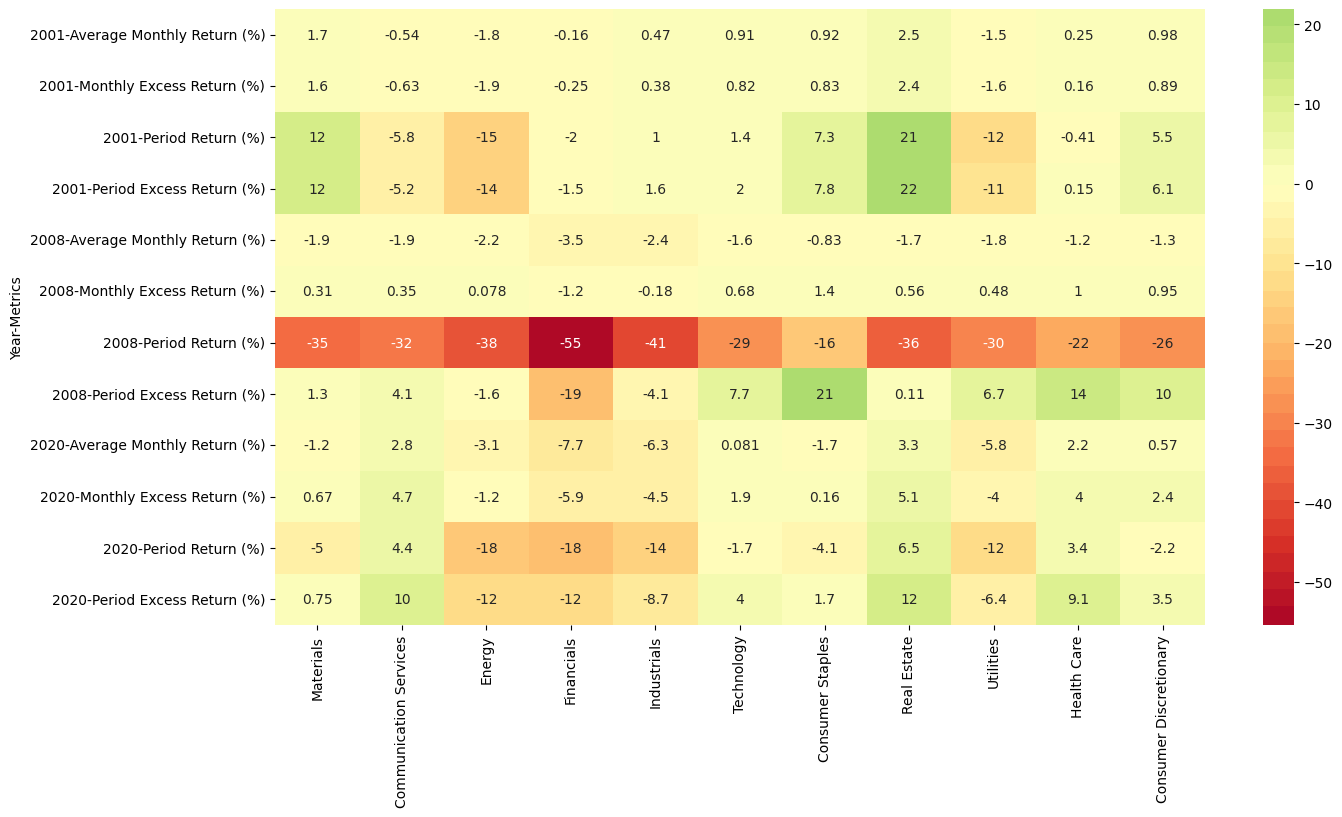

In [84]:
import seaborn as sns
palette = sns.color_palette("RdYlGn", 50)
plt.figure(figsize=(15,8))
sns.heatmap(perforamce_NBER.fillna(0),cmap=palette,center=0 , annot=True)

<Axes: ylabel='Year-Metrics'>

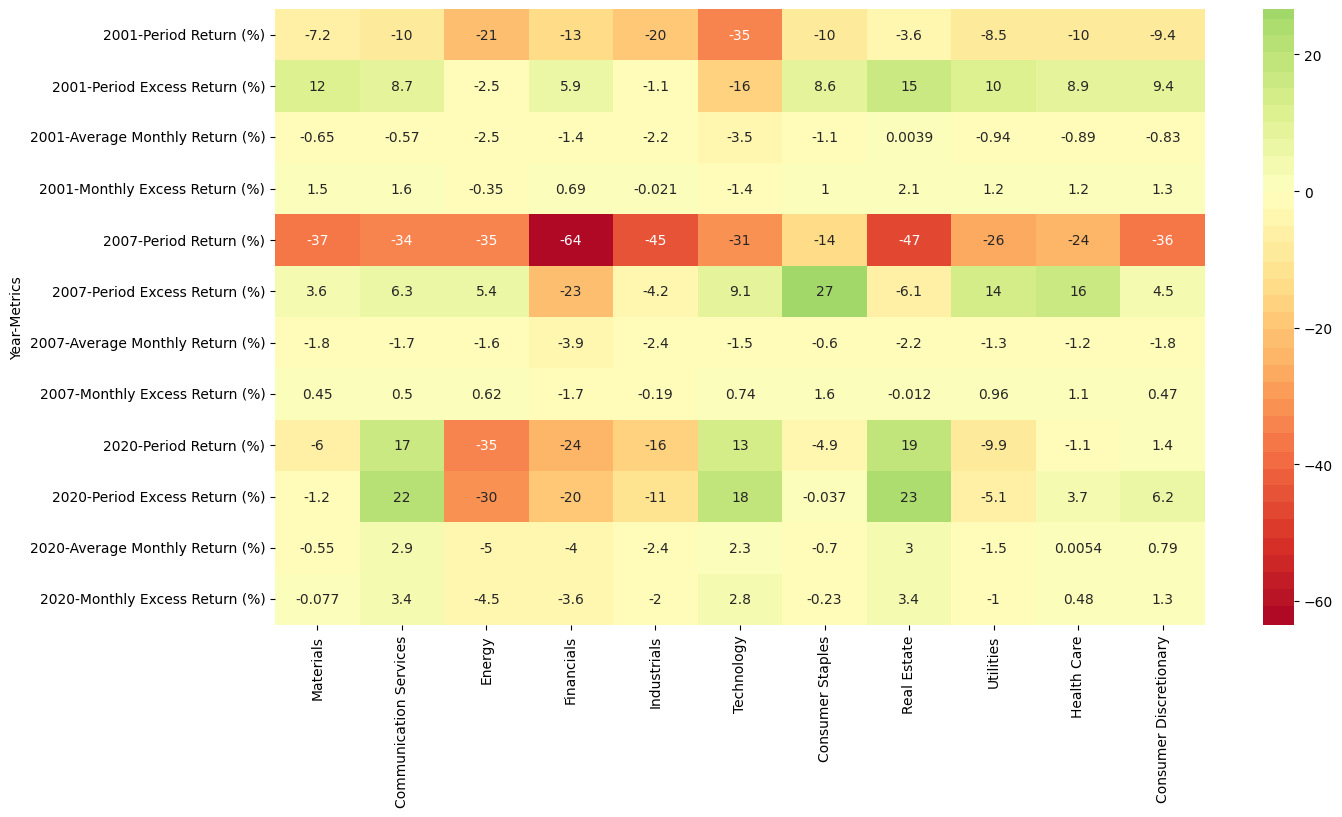

In [85]:

plt.figure(figsize=(15,8))
sns.heatmap(perforamce_GDP.fillna(0),cmap=palette,center=0 , annot=True)

In [ ]:
test=perforamce_GDP.copy().reset_index().drop(columns='Year').groupby('Metrics').mean()

<Axes: ylabel='Metrics'>

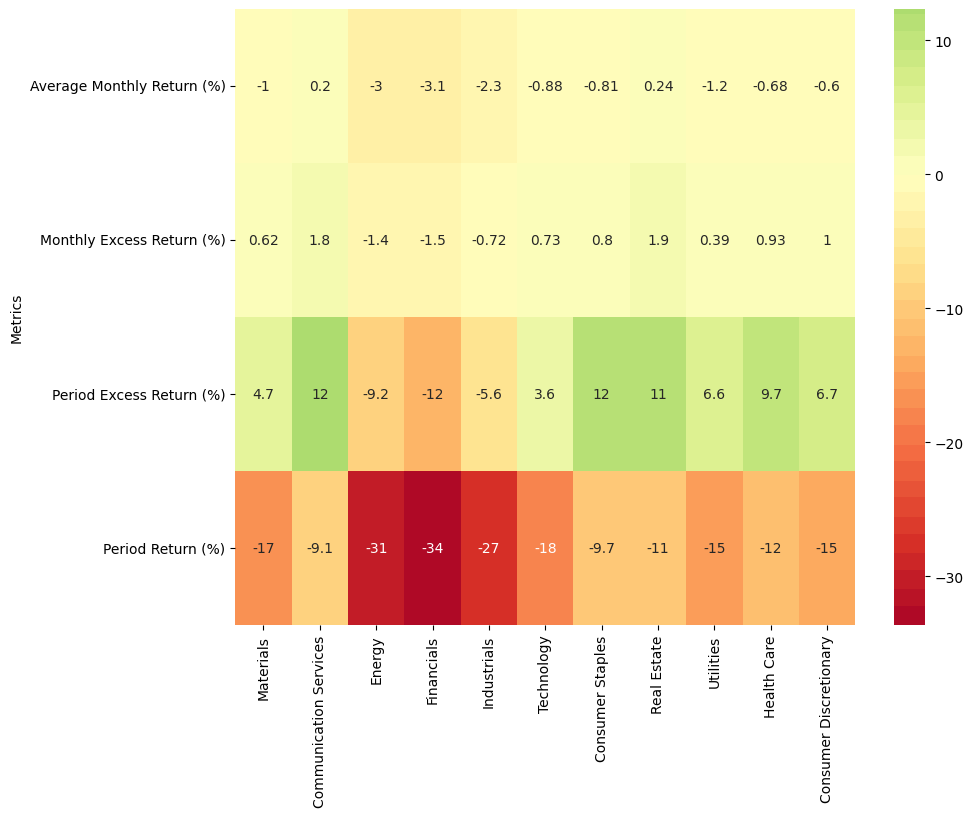

In [86]:
plt.figure(figsize=(10,8))
sns.heatmap(test.fillna(0),cmap=palette,center=0 , annot=True)

In [ ]:
vreak

NameError: name 'vreak' is not defined

# Messing around

In [ ]:
import requests,re

def extract_sector(ticker):
    url = f"https://stockanalysis.com/stocks/{ticker}/"
    response = requests.get(url)

    match= re.findall(r'(?<=<a href="/stocks/sector/communication-services/" class="dothref text-default">)[\w ]+(?=<\/a>)',response.text)
    if match:
        return match[0]
    return


extract_sector('ddd')

In [ ]:
import financedatabase as fd

equities = fd.Equities()
equities_united_states = equities.select(country="United States")


In [ ]:
Exchange_tickers=equities_united_states.query("sector=='Communication Services' and market!='OTC Bulletin Board'").index.to_list()

In [ ]:
import os
data_folder_path='Data\Stockanalysis.com'
dfs = {}
append_count=0
# Loop through all the files in the Data folder
for filename in os.listdir(data_folder_path):
# Check if the file is a CSV file
    if filename.endswith('.csv') and ('-' in filename):
    # Get the ticker from the filename
        ticker = filename.split('-')[0].upper()
        df=pd.read_csv(os.path.join(data_folder_path,filename),index_col=0,parse_dates=True)[['Market Cap']]
        df.index=pd.DatetimeIndex(df.index)
        dfs[ticker]=df
        append_count+=1


In [ ]:
Communication_Services=pd.read_csv(r'Data\Stockanalysis.com\Communication Services\Communication Services.csv',parse_dates=True,index_col=0)
Real_Estate=pd.read_csv(r'Data\Stockanalysis.com\Real Estate\Real Estate.csv',index_col=0,parse_dates=True)

In [ ]:

Real_Estate

,Index
Date,
1980-03-17,0.675073
1980-03-18,0.669585
1980-03-19,0.664096
1980-03-20,0.647631
1980-03-21,0.647631
...,...
2023-04-17,128.358859
2023-04-18,128.143462
2023-04-19,128.273763


In [ ]:
def Append_Price(dataframe):
    df=dataframe.copy()
    df.index= pd.DatetimeIndex(df.index)

    prices=yf.download(df.columns.get_level_values(0).to_list())['Adj Close']
    prices.columns=pd.MultiIndex.from_product([['Price'], prices.columns])

    df.columns=df.columns.swaplevel(0,1)

    data_MC_P=df.join(prices,how="outer")
    data_MC_P.index= pd.DatetimeIndex(data_MC_P.index)
    return data_MC_P.loc[:'2023-04-01']

In [ ]:
data_MC_P=Append_Price(Communication_Services[list((set(Communication_Services.columns.get_level_values(0)) & set(Exchange_tickers)) - set(['COMS']))])


[*********************100%***********************]  160 of 160 completed

1 Failed download:
- TWTR: No timezone found, symbol may be delisted


In [ ]:
data_MC_P[('Price','TWTR')]=pd.read_csv(r'Data\twtr-chart.csv',parse_dates=True,index_col=0)['Close']

<Axes: xlabel='Date'>

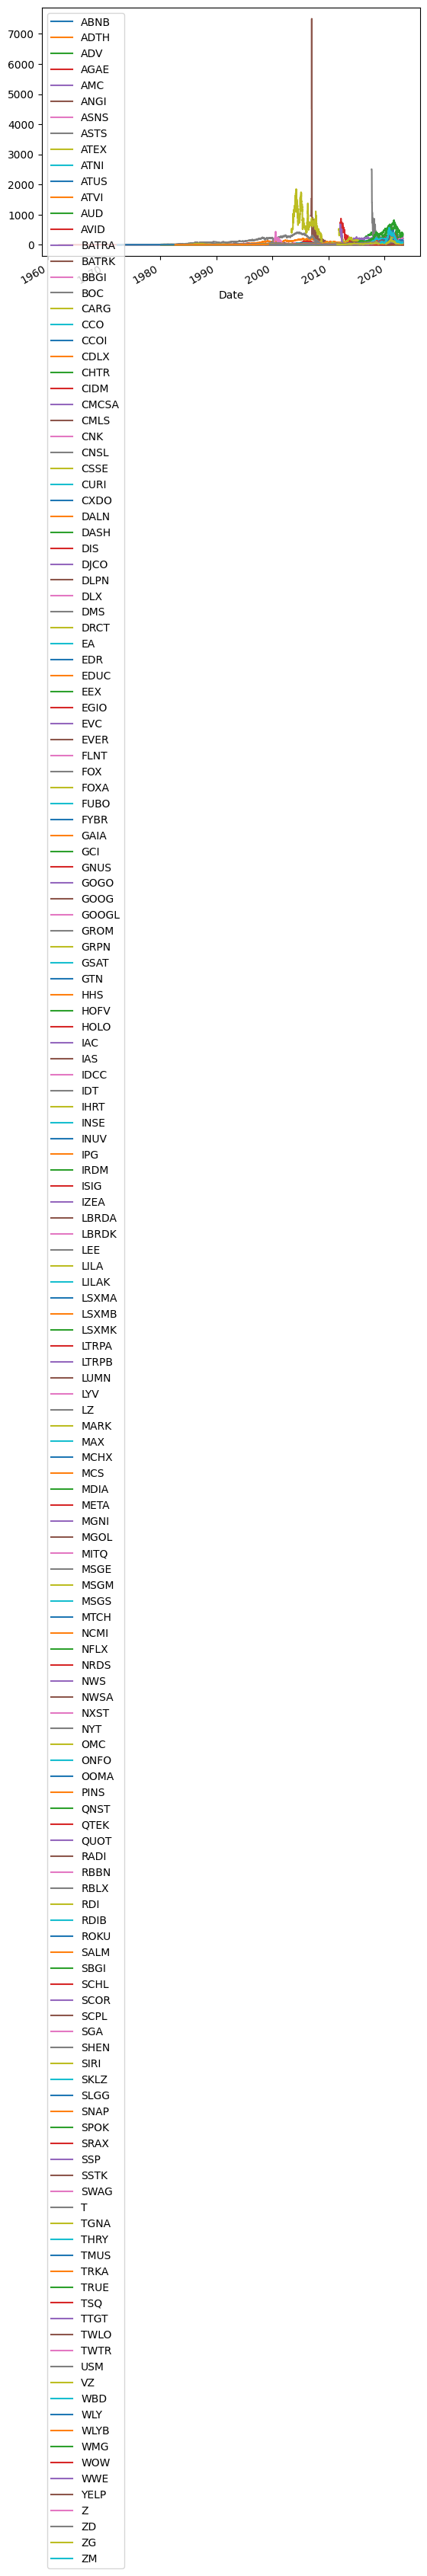

In [ ]:
data_MC_P['Price'].plot()

In [ ]:
equities_united_states.loc[['COMS']]

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
COMS,COMSovereign Holding Corp.,"ComSovereign Holding Corp. designs, develops, ...",USD,Communication Services,Telecommunication Services,Diversified Telecommunication Services,NCM,NASDAQ Capital Market,United States,TX,Dallas,75254,http://www.comsovereign.com,Nano Cap,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_MC_P['Price'].max().sort_values(ascending=False).index.to_list()

['DLPN',
 'GROM',
 'MARK',
 'GNUS',
 'CHTR',
 'NFLX',
 'IZEA',
 'ZM',
 'GRPN',
 'ROKU',
 'TWLO',
 'RBBN',
 'LEE',
 'DJCO',
 'META',
 'MSGM',
 'HOFV',
 'DASH',
 'MSGS',
 'ABNB',
 'NXST',
 'HHS',
 'ZG',
 'DIS',
 'Z',
 'LBRDK',
 'LBRDA',
 'MTCH',
 'IAC',
 'CDLX',
 'TMUS',
 'GOOG',
 'GOOGL',
 'EA',
 'CIDM',
 'RBLX',
 'ZD',
 'LYV',
 'SSTK',
 'TTGT',
 'USM',
 'ATVI',
 'YELP',
 'WWE',
 'OMC',
 'PINS',
 'IDCC',
 'SNAP',
 'ATNI',
 'CCOI',
 'TWTR',
 'WBD',
 'LTRPB',
 'AVID',
 'IDT',
 'LILAK',
 'ATEX',
 'IRDM',
 'SCOR',
 'DLX',
 'MAX',
 'EVER',
 'AMC',
 'FUBO',
 'WLY',
 'MGNI',
 'WLYB',
 'INUV',
 'SIRI',
 'CMCSA',
 'LSXMB',
 'CARG',
 'LSXMA',
 'LSXMK',
 'NYT',
 'VZ',
 'SBGI',
 'WMG',
 'BOC',
 'LILA',
 'SCHL',
 'AUD',
 'CSSE',
 'FLNT',
 'SKLZ',
 'MCS',
 'FOXA',
 'THRY',
 'ISIG',
 'SGA',
 'CNK',
 'FOX',
 'RDI',
 'LZ',
 'IPG',
 'SHEN',
 'LTRPA',
 'ATUS',
 'BATRA',
 'BATRK',
 'RDIB',
 'FYBR',
 'EDR',
 'GOGO',
 'QUOT',
 'GAIA',
 'NRDS',
 'TGNA',
 'ANGI',
 'IHRT',
 'NWSA',
 'IAS',
 'NWS',
 'QNST',
 'GT

In [ ]:
def Make_Index(data_MC_P):
    data_MC_P_test=data_MC_P.copy()
    data_MC_P_test.fillna(0,inplace=True)
    TotalMC=data_MC_P_test['Market Cap'].sum(axis=1)
    
    W=data_MC_P_test['Market Cap'].apply(
                                     lambda x: np.asarray(x) * 1/np.asarray(TotalMC)
                                     )
    index=(data_MC_P_test['Price']*W).sum(axis=1).to_frame('Index')
    index=index.loc[~(index==0).all(axis=1)]
    return index,W

In [ ]:
index,W=Make_Index(data_MC_P)

C:\Users\amine\AppData\Local\Temp\ipykernel_4268\3022476493.py:7: RuntimeWarning: invalid value encountered in divide
  lambda x: np.asarray(x) * 1/np.asarray(TotalMC)


,Index
Date,
1983-08-15,1.106086
1983-08-16,1.106086
1983-08-17,1.106086
1983-08-18,1.106086
1983-08-19,1.121640
...,...
2023-03-27,111.684568
2023-03-28,110.237279
2023-03-29,111.811618


(<Figure size 3900x2700 with 1 Axes>, <Axes: xlabel='Date'>)

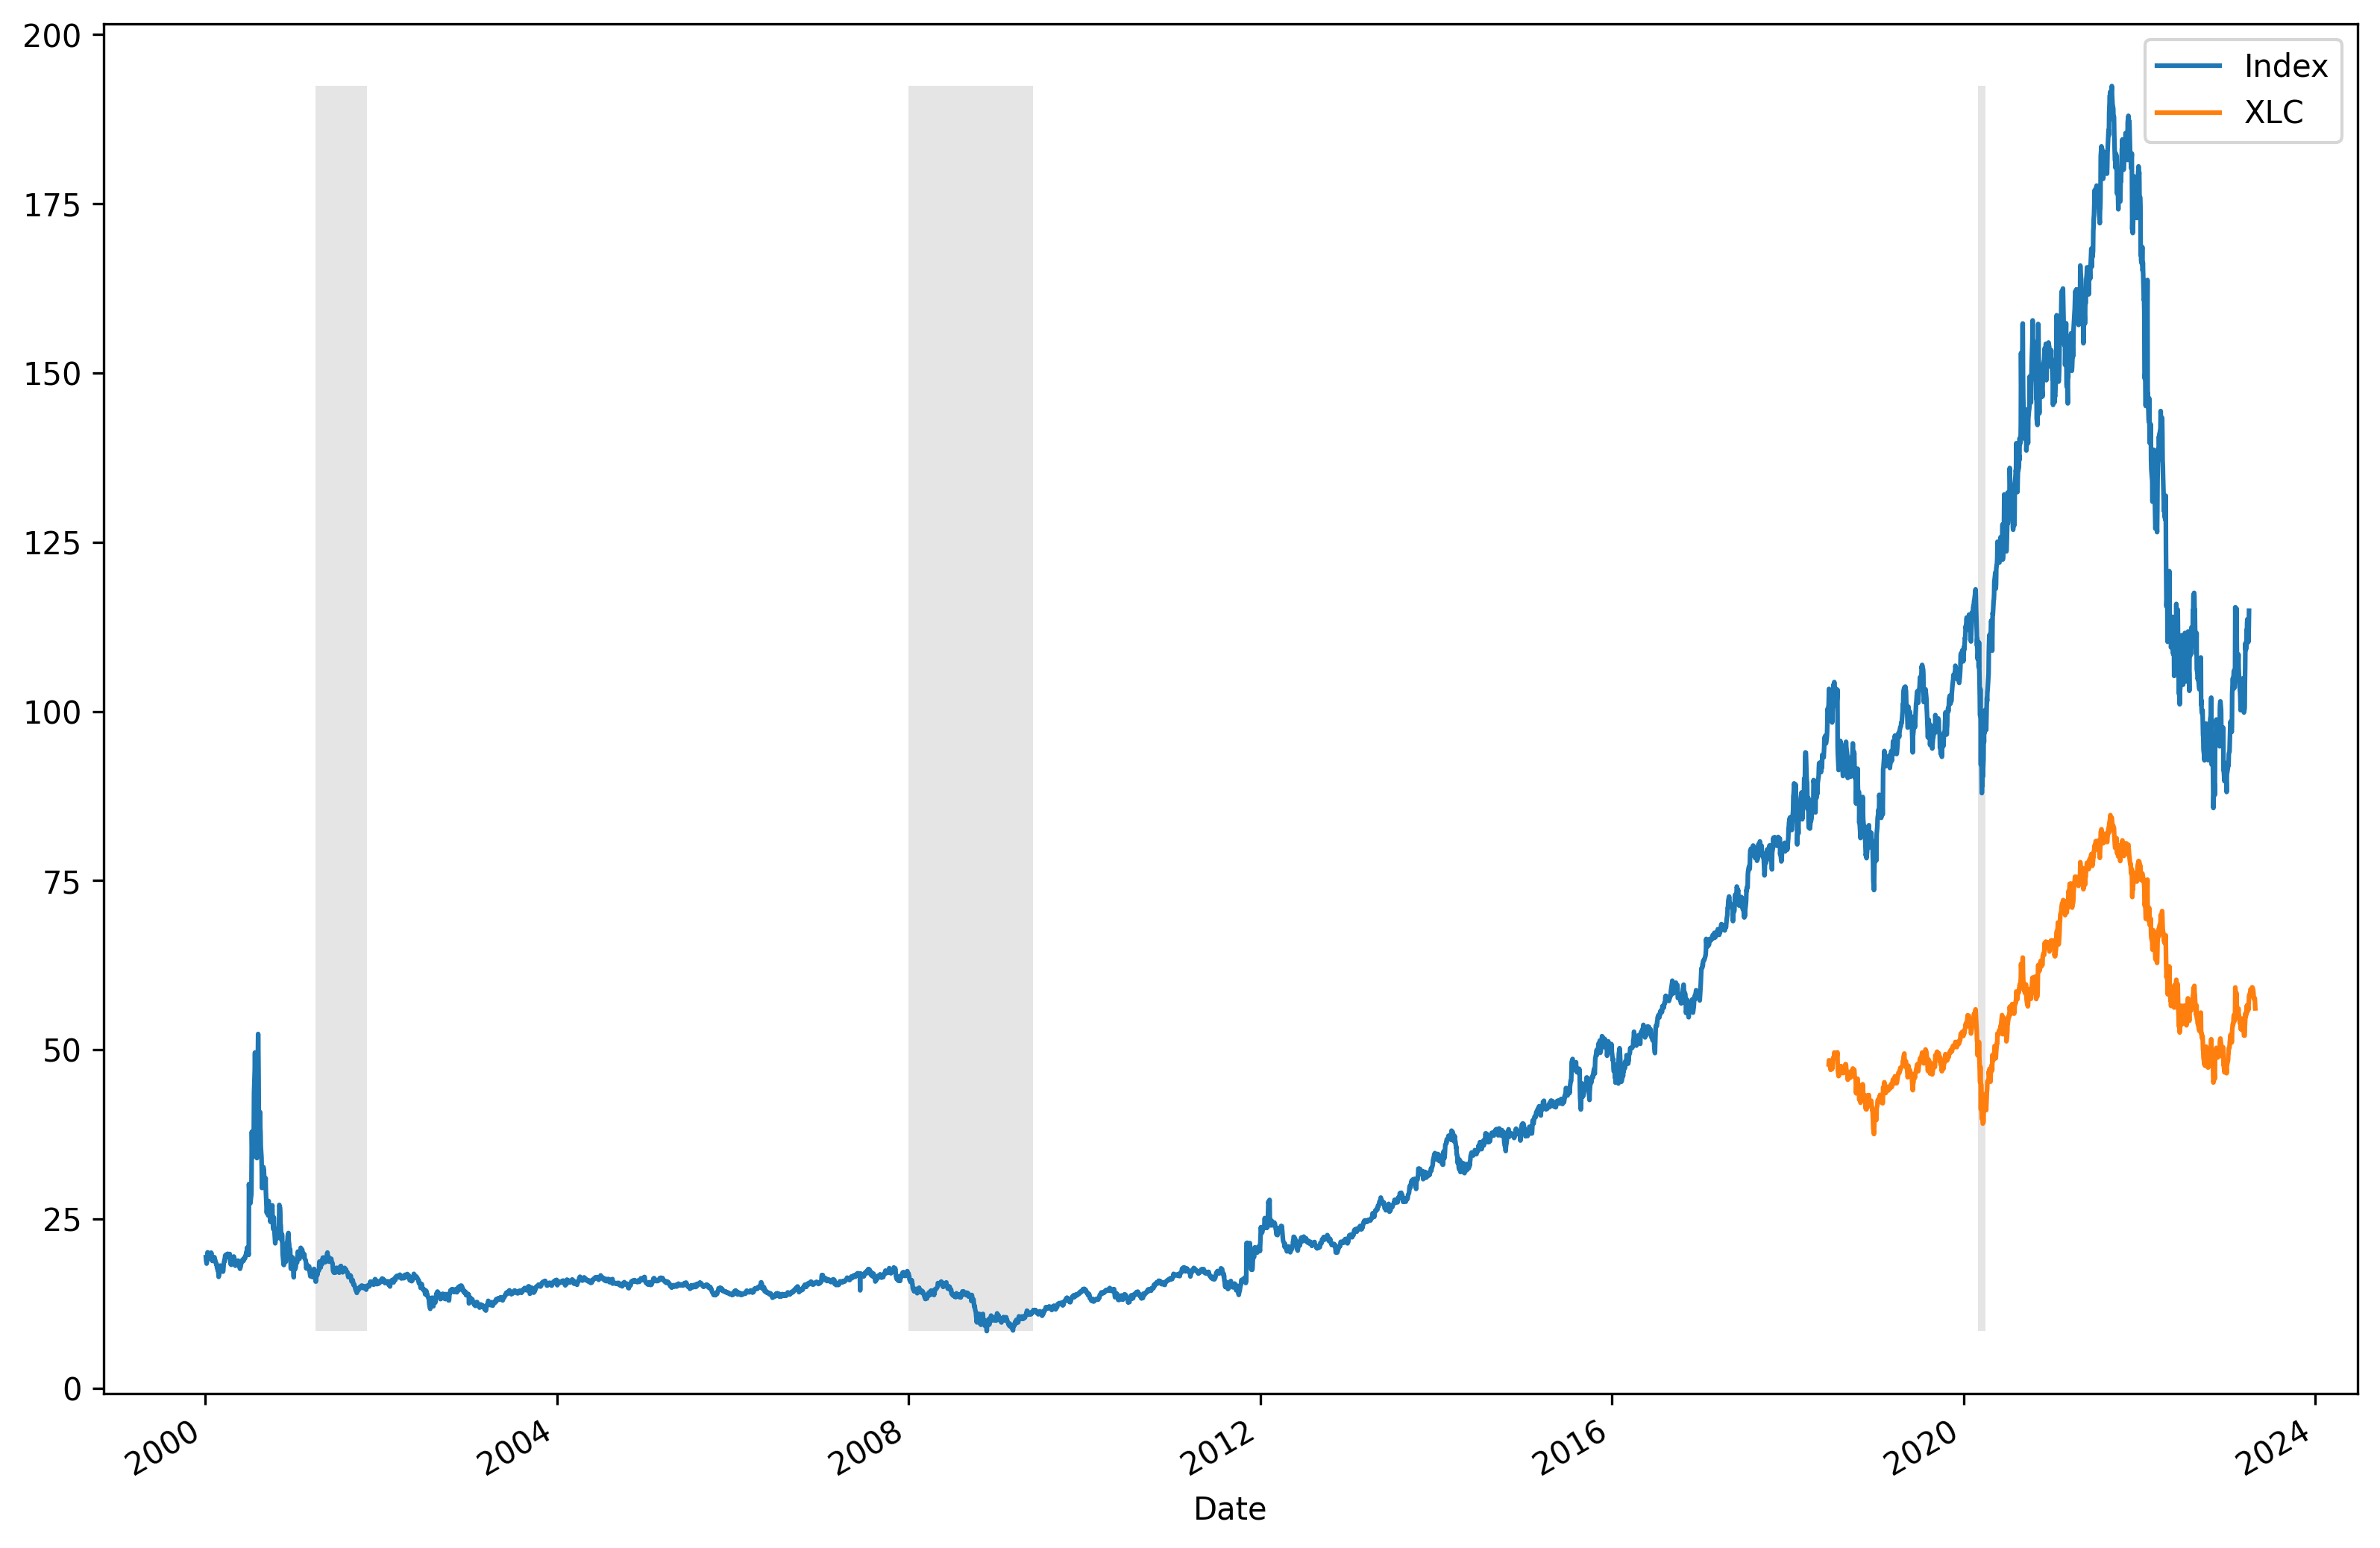

In [ ]:
plot(pd.concat([index,SPDR['XLC']],axis=1).loc["2000":])